In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.metrics import f1_score

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')

import re

import xgboost, textblob, string

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].


In [3]:
processed_df = pd.read_pickle('/content/drive/My Drive/Нейронные сети/Neural Language Processing/Lesson 1/combine_df.zip')
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49159 non-null  int64  
 1   label                 31962 non-null  float64
 2   tweet                 49159 non-null  object 
 3   processed_tweet       49159 non-null  object 
 4   tweet_token           49159 non-null  object 
 5   tweet_token_filtered  49159 non-null  object 
 6   tweet_stemmed         49159 non-null  object 
 7   tweet_lemmatized      49159 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


In [4]:
processed_df = processed_df.dropna()
processed_df.label = processed_df.label.astype(int)
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 0 to 31961
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    31962 non-null  int64 
 1   label                 31962 non-null  int64 
 2   tweet                 31962 non-null  object
 3   processed_tweet       31962 non-null  object
 4   tweet_token           31962 non-null  object
 5   tweet_token_filtered  31962 non-null  object
 6   tweet_stemmed         31962 non-null  object
 7   tweet_lemmatized      31962 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


In [5]:
SIZE = int(len(processed_df) * 0.8)
SIZE

25569

In [6]:
(X_train_stemmed, y_train_stemmed), (X_test_stemmed, y_test_stemmed) = (
    processed_df.tweet_stemmed.apply(lambda x: ' '.join(x)).values[:SIZE], processed_df.label.tolist()[:SIZE]
), (
    processed_df.tweet_stemmed.apply(lambda x: ' '.join(x)).values[SIZE:], processed_df.label.tolist()[SIZE:]
)

X_train_stemmed.shape, len(y_train_stemmed), X_test_stemmed.shape, len(y_test_stemmed)

((25569,), 25569, (6393,), 6393)

In [7]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    return f1_score(y_test, preds[:,1]>0.3)

In [8]:
count_vec = CountVectorizer(max_df=0.9, stop_words='english', max_features=1000)
xtrain_stemmed_count_vec = count_vec.fit_transform(X_train_stemmed)
xtest_stemmed_count_vec = count_vec.transform(X_test_stemmed)

clf = linear_model.LogisticRegression()
f1_score_stemmed_count_vec = train_model(
    clf, 
    xtrain_stemmed_count_vec, 
    y_train_stemmed, 
    xtest_stemmed_count_vec, 
    y_test_stemmed)
f1_score_stemmed_count_vec

0.5444743935309974

In [9]:
tfidf_vec = TfidfVectorizer(max_df=0.9, stop_words='english', max_features=5000)
xtrain_stemmed_tfidf_vec = count_vec.fit_transform(X_train_stemmed)
xtest_stemmed_tfidf_vec = count_vec.transform(X_test_stemmed)

clf = linear_model.LogisticRegression()
f1_score_stemmed_tfidf_vec = train_model(
    clf, 
    xtrain_stemmed_tfidf_vec, 
    y_train_stemmed, 
    xtest_stemmed_tfidf_vec, 
    y_test_stemmed)
f1_score_stemmed_tfidf_vec

0.5444743935309974

In [10]:
(X_train_lemmatized, y_train_lemmatized), (X_test_lemmatized, y_test_lemmatized) = (
    processed_df.tweet_lemmatized.apply(lambda x: ' '.join(x)).values[:SIZE], processed_df.label.tolist()[:SIZE]
), (
    processed_df.tweet_lemmatized.apply(lambda x: ' '.join(x)).values[SIZE:], processed_df.label.tolist()[SIZE:]
)

In [11]:
count_vec = CountVectorizer(max_df=0.9, stop_words='english', max_features=1000)

xtrain_lemmatized_count_vec = count_vec.fit_transform(X_train_lemmatized)
xtest_lemmatized_count_vec = count_vec.transform(X_test_lemmatized)

clf = linear_model.LogisticRegression()

f1_score_lemmatized_count_vec = train_model(
    clf, 
    xtrain_lemmatized_count_vec, 
    y_train_lemmatized, 
    xtest_lemmatized_count_vec, 
    y_test_lemmatized)
f1_score_lemmatized_count_vec

0.53835800807537

In [12]:
tfidf_vec = TfidfVectorizer(max_df=0.9, stop_words='english', max_features=1000)
xtrain_lemmatized_tfidf_vec = tfidf_vec.fit_transform(X_train_lemmatized)
xtest_lemmatized_tfidf_vec = tfidf_vec.transform(X_test_lemmatized)

clf = linear_model.LogisticRegression()

f1_score_lemmatized_tfidf_vec = train_model(
    clf, 
    xtrain_lemmatized_tfidf_vec, 
    y_train_lemmatized, 
    xtest_lemmatized_tfidf_vec, 
    y_test_lemmatized)
f1_score_lemmatized_tfidf_vec

0.5296551724137931

Выведите результаты f1-score всех моделей, сделайте вывод.

In [13]:
f1_score_stemmed_tfidf_vec

0.5444743935309974

In [14]:
f1_score_stemmed_count_vec

0.5444743935309974

In [15]:
f1_score_lemmatized_tfidf_vec

0.5296551724137931

In [16]:
f1_score_lemmatized_count_vec

0.53835800807537

##### Стемминг показал результат лучше чем лемматизация, при любом векторайзере

Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова


In [20]:
import collections
import matplotlib.pyplot as plt
stop_words = set(nltk.corpus.stopwords.words("english"))

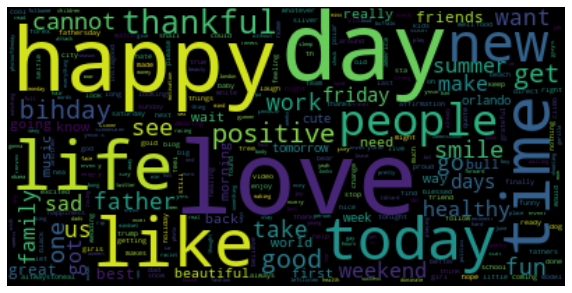

In [28]:
words = []
for line in processed_df['processed_tweet']: 
    line_words = [word for word in line.split() if word not in stop_words]
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='black',
 max_words=1000,
 stopwords=stop_words
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

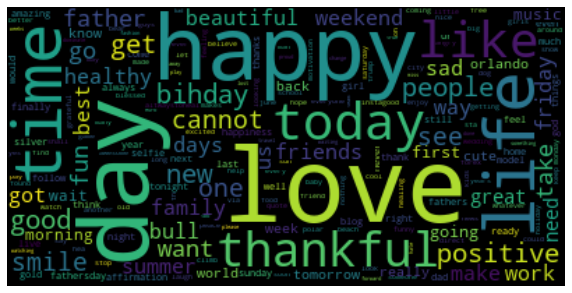

In [31]:
words = []
for line in processed_df.loc[processed_df['label'] == 0, 'processed_tweet']: 
    line_words = [word for word in line.split() if word not in stop_words]
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='black',
 max_words=1000,
 stopwords=stop_words
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

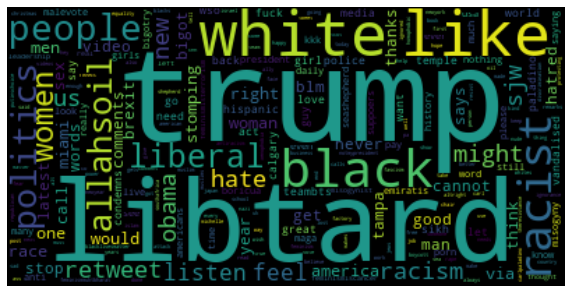

In [30]:
words = []
for line in processed_df.loc[processed_df['label'] == 1, 'processed_tweet']: 
    line_words = [word for word in line.split() if word not in stop_words]
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='black',
 max_words=2000,
 stopwords=stop_words
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()